In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear(x, m, c):
    return m*x + c
def const(x, c):
    return np.zeros(x.shape) + c

# Zener Diode

## Line Regulation

In [2]:
fh = open('data1.txt', 'r')
data = [list(map(float, line.split())) for line in fh.readlines()[1:]]
fh.close()
data = np.array(data)
V_i = data[:, 0]
I_s = data[:, 1]
I_z = data[:, 2]
V_o = data[:, 3]

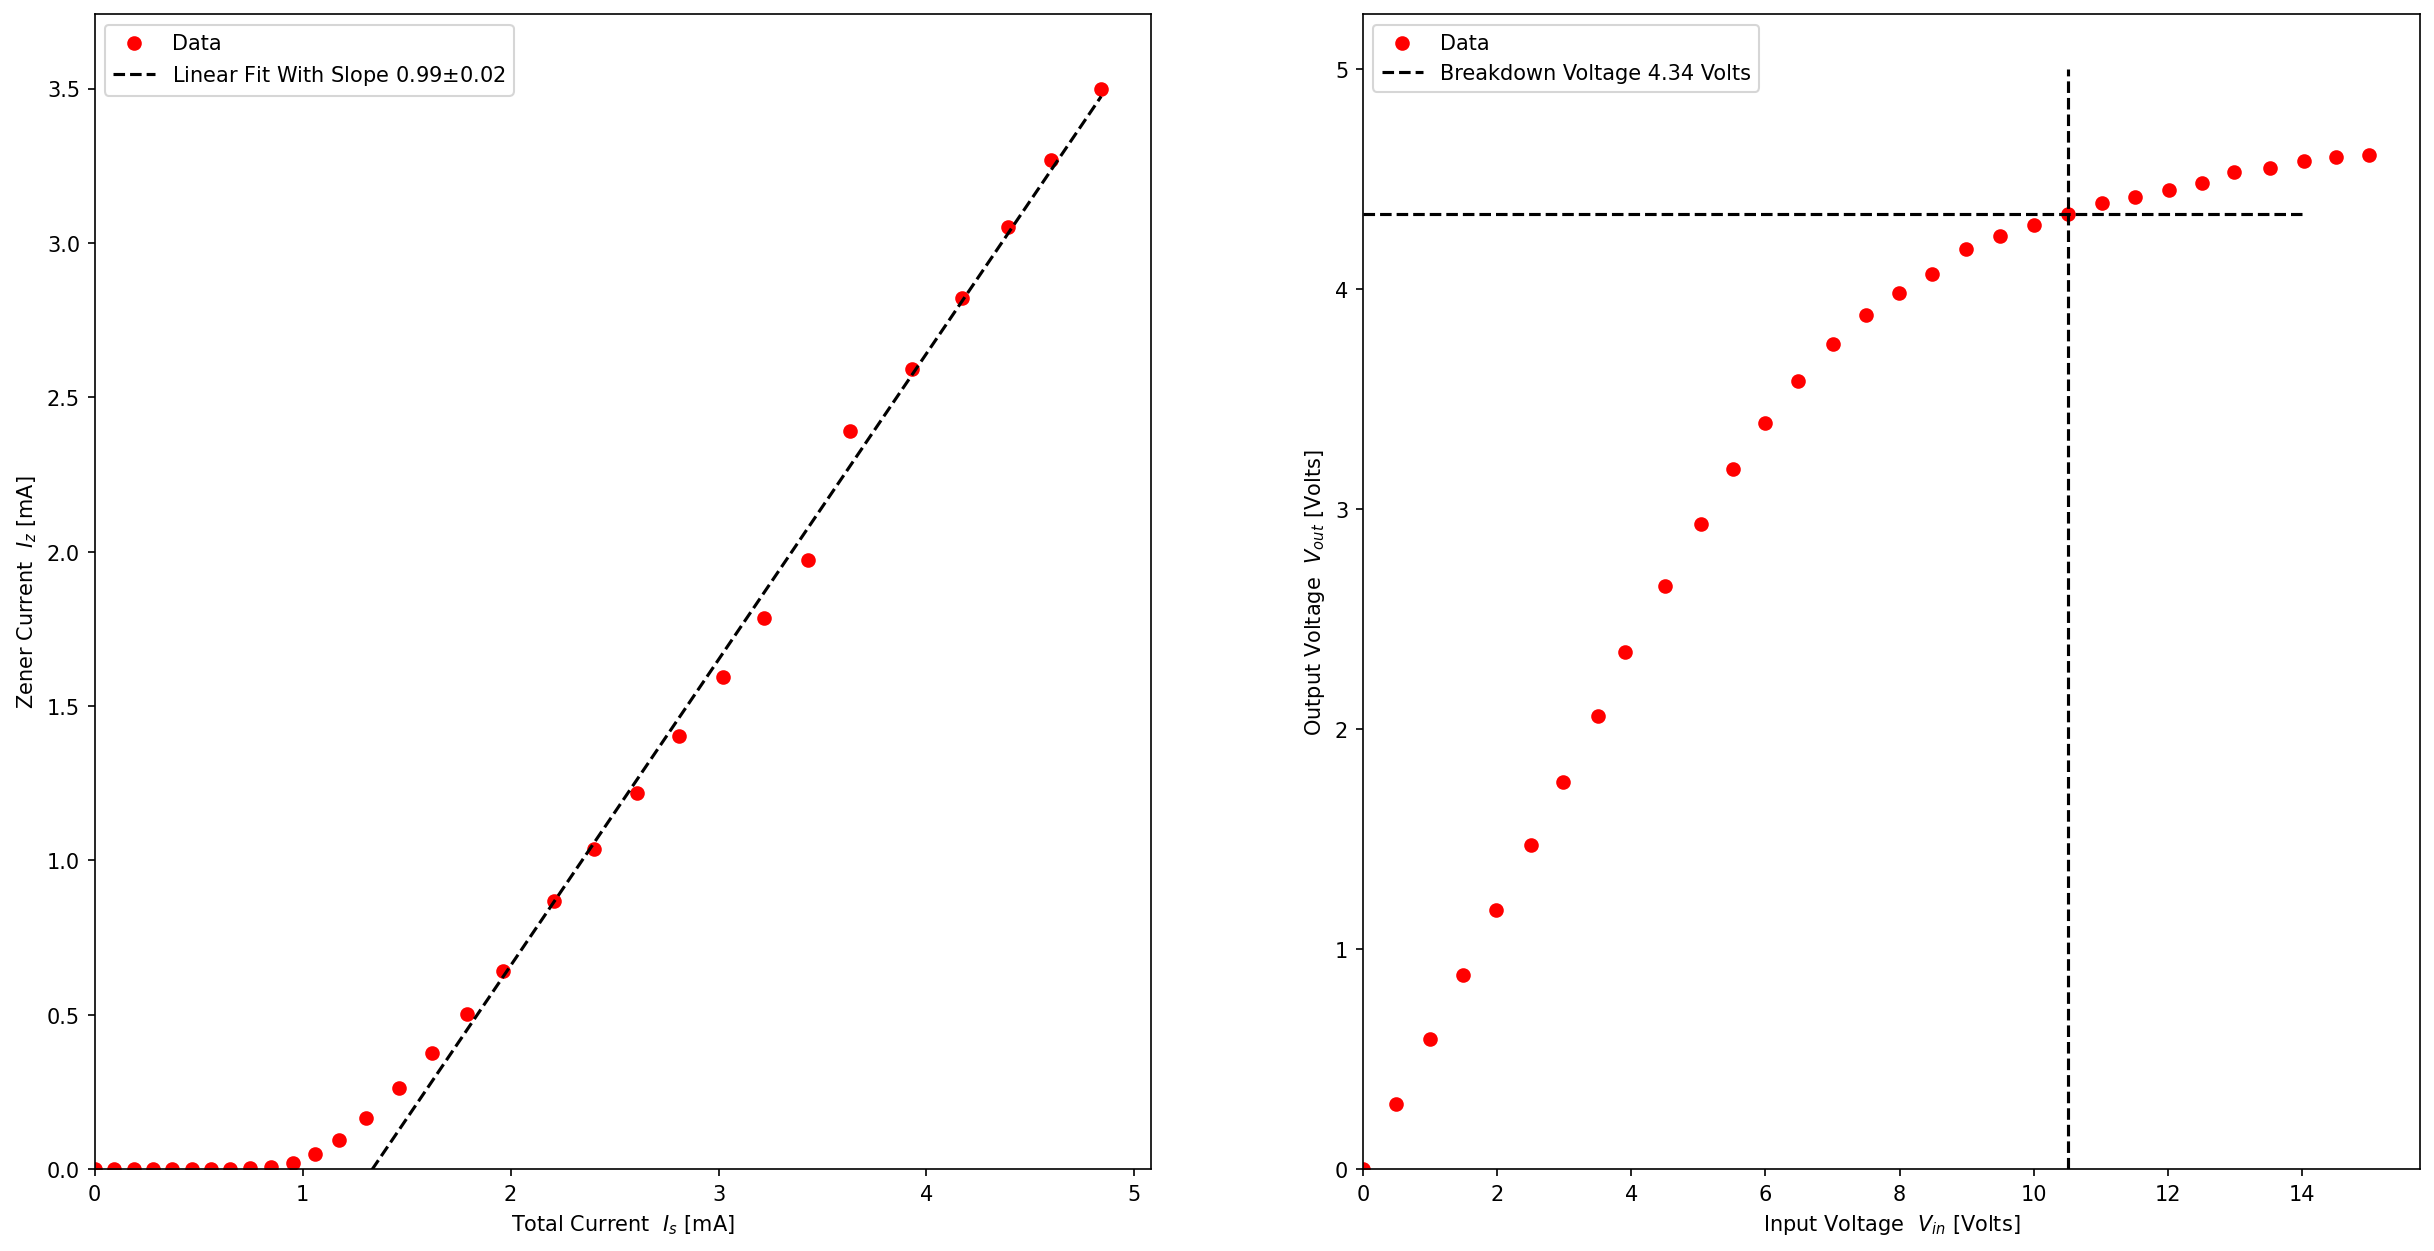

In [3]:
fig, axes = plt.subplots(1, 2, dpi = 150, figsize=(20, 10))
ax = axes[0]
ax.scatter(I_s, I_z, color="red", label="Data")
popt, pcov = curve_fit(linear, I_s[15:], I_z[15:])
smp = np.array([np.min(I_s), np.max(I_s)])
ax.plot(smp, linear(smp, popt[0], popt[1]), "k--", label=f"Linear Fit With Slope {popt[0]:.2f}"+r"$\pm$"+f"{np.sqrt(np.diag(pcov)[0]):.2f}")
ax.set_xlabel("Total Current$~~I_s$ [mA]")
ax.set_ylabel("Zener Current$~~I_z$ [mA]")
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.legend()

ax = axes[1]
ax.scatter(V_i, V_o, color="red", label="Data")
bv = 4.34
ax.hlines(bv, 0, 14, "k", "dashed", label=f"Breakdown Voltage {bv} Volts")
ax.vlines(10.51, 0, 5, "k", "dashed")
ax.set_ylim(0)
ax.set_xlim(0)
# ax.plot(V_i, V_o, "k--")
ax.set_xlabel("Input Voltage$~~V_{in}$ [Volts]")
ax.set_ylabel("Output Voltage$~~V_{out}$ [Volts]")
ax.legend(loc="upper left")
plt.savefig("linereg.png")

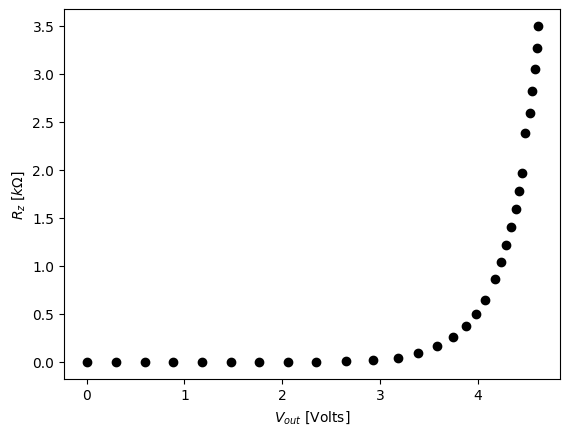

In [4]:
R_z = np.array([(V_o[i + 1] - V_o[i]) / ((I_z[i + 1] - I_z[i])) for i in range(7, V_o.shape[0] - 1)])
plt.scatter(V_o, I_z, color="black")
plt.ylabel(r"$R_z$ [$k\Omega$]")
plt.xlabel("$V_{out}$ [Volts]")
plt.savefig("zener-VI-dynamic-char.png")
plt.show()

## Load Regulation

### $R_c = 1k\Omega$

In [5]:
fh = open('data2.txt', 'r')
data = [list(map(float, line.split())) for line in fh.readlines()[1:]]
fh.close()
data = np.array(data)
V_i2 = data[:, 0]
R_L2 = data[:, 1]
I_L2 = data[:, 2]
I_z2 = data[:, 3]
V_o2 = data[:, 4]

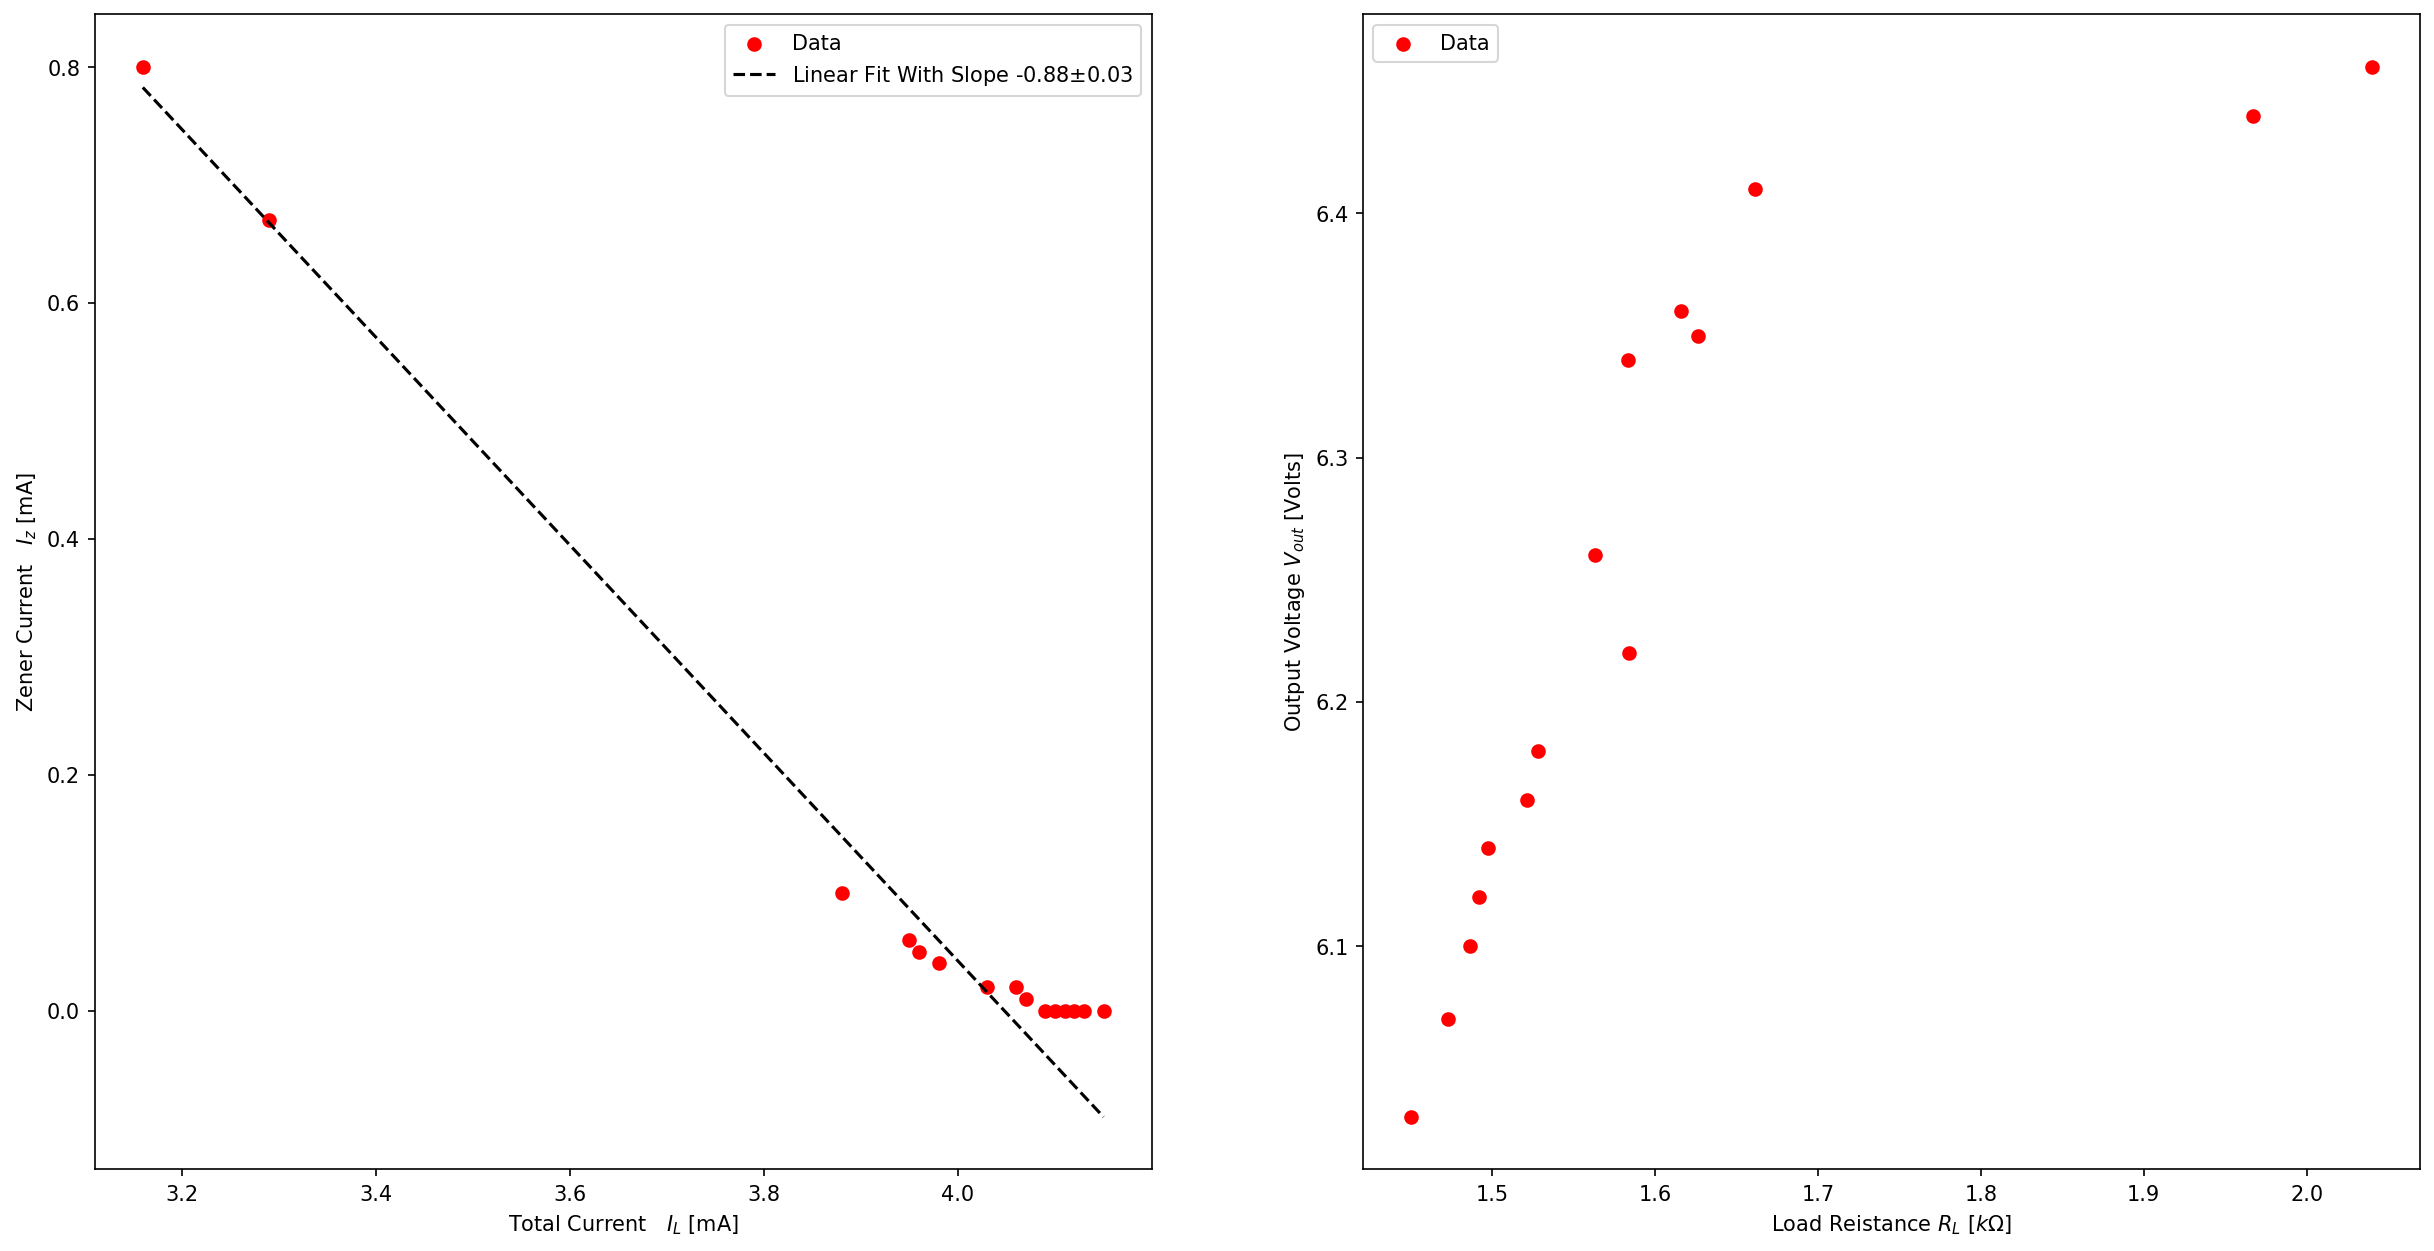

In [6]:
fig, axes = plt.subplots(1, 2, dpi = 150, figsize=(20, 10))
ax = axes[0]
ax.scatter(I_L2, I_z2, color="red", label="Data")
popt, pcov = curve_fit(linear, I_L2[5:], I_z2[5:])
smp = np.array([np.min(I_L2), np.max(I_L2)])
ax.plot(smp, linear(smp, popt[0], popt[1]), "k--", label=f"Linear Fit With Slope {popt[0]:.2f}"+r"$\pm$"+f"{np.sqrt(np.diag(pcov)[0]):.2f}")
ax.set_xlabel("Total Current\t$I_L$ [mA]")
ax.set_ylabel("Zener Current\t$I_z$ [mA]")
# ax.set_xlim(left=0)
# ax.set_ylim(bottom=0)
ax.legend()

ax = axes[1]
ax.scatter(R_L2, V_o2, color="red", label="Data")
# ax.plot(V_i, V_o, "k--")
ax.set_xlabel(r"Load Reistance$~R_L$ [$k\Omega$]")
ax.set_ylabel("Output Voltage$~V_{out}$ [Volts]")
ax.legend(loc="upper left")
fig.savefig("withoutrc.png")

### $R_c = 2.2 k\Omega$

In [7]:
fh = open('data3.txt', 'r')
data = [list(map(float, line.split())) for line in fh.readlines()[1:]]
fh.close()
data = np.array(data)
V_i3 = data[:, 0]
R_L3 = data[:, 1] + 2.2
I_L3 = data[:, 2]
I_z3 = data[:, 3]
V_o3 = data[:, 4]

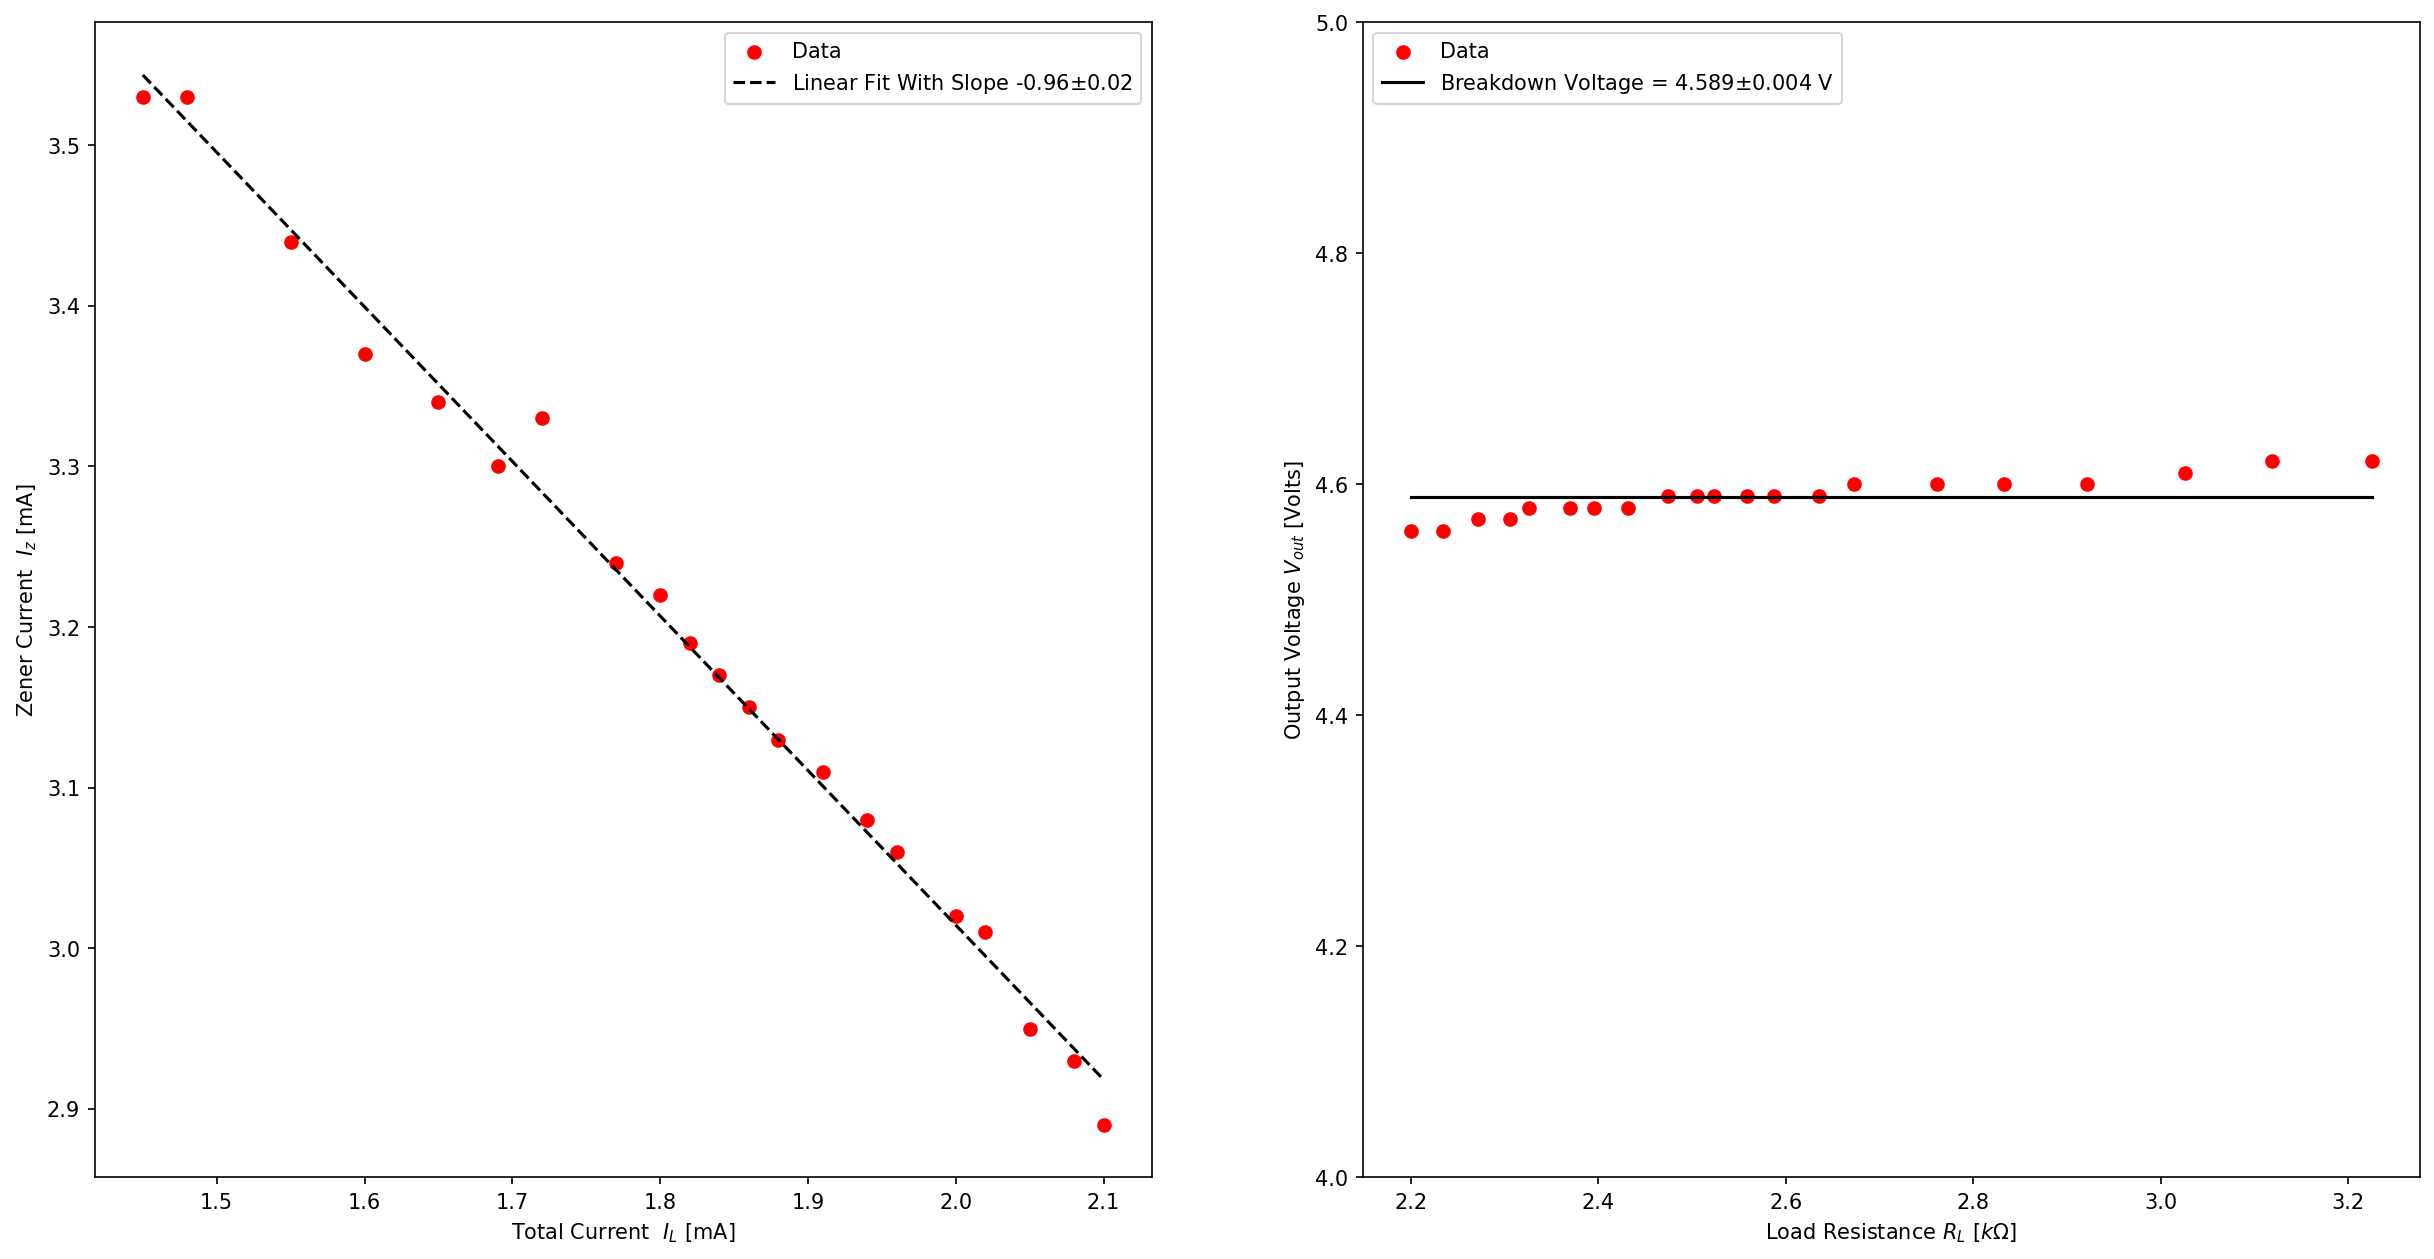

In [8]:
fig, axes = plt.subplots(1, 2, dpi = 150, figsize=(20, 10))
ax = axes[0]
ax.scatter(I_L3, I_z3, color="red", label="Data")
popt, pcov = curve_fit(linear, I_L3, I_z3)
smp = np.array([np.min(I_L3), np.max(I_L3)])
ax.plot(smp, linear(smp, popt[0], popt[1]), "k--", label=f"Linear Fit With Slope {popt[0]:.2f}"+r"$\pm$"+f"{np.sqrt(np.diag(pcov)[0]):.2f}")
ax.set_xlabel("Total Current$~~I_L$ [mA]")
ax.set_ylabel("Zener Current$~~I_z$ [mA]")
# ax.set_xlim(left=0)
# ax.set_ylim(bottom=0)
ax.legend()

ax = axes[1]
ax.scatter(R_L3, V_o3, color="red", label="Data")
# ax.plot(R_L3, V_o3, "k--")
popt2, pcov2 = curve_fit(const, R_L3, V_o3)
ax.plot(R_L3, const(R_L3, popt2[0]), "k-", label=f"Breakdown Voltage = {popt2[0]:.3f}"+r"$\pm$" + f"{np.sqrt(pcov2[0]).item():.3f} V")
# ax.plot(V_i, V_o, "k--")
ax.set_xlabel(r"Load Resistance$~R_L$ [$k\Omega$]")
ax.set_ylabel("Output Voltage$~V_{out}$ [Volts]")
ax.set_ylim(4, 5)
ax.legend(loc="upper left")
fig.savefig("withrc.png")

# Part B (IC 7805)

## Line Regulation

In [9]:
fh = open('data4.txt', 'r')
data = [list(map(float, line.split())) for line in fh.readlines()[1:]]
fh.close()
data = np.array(data)
V_i_IC = data[:, 0]
V_o_IC = data[:, 1]

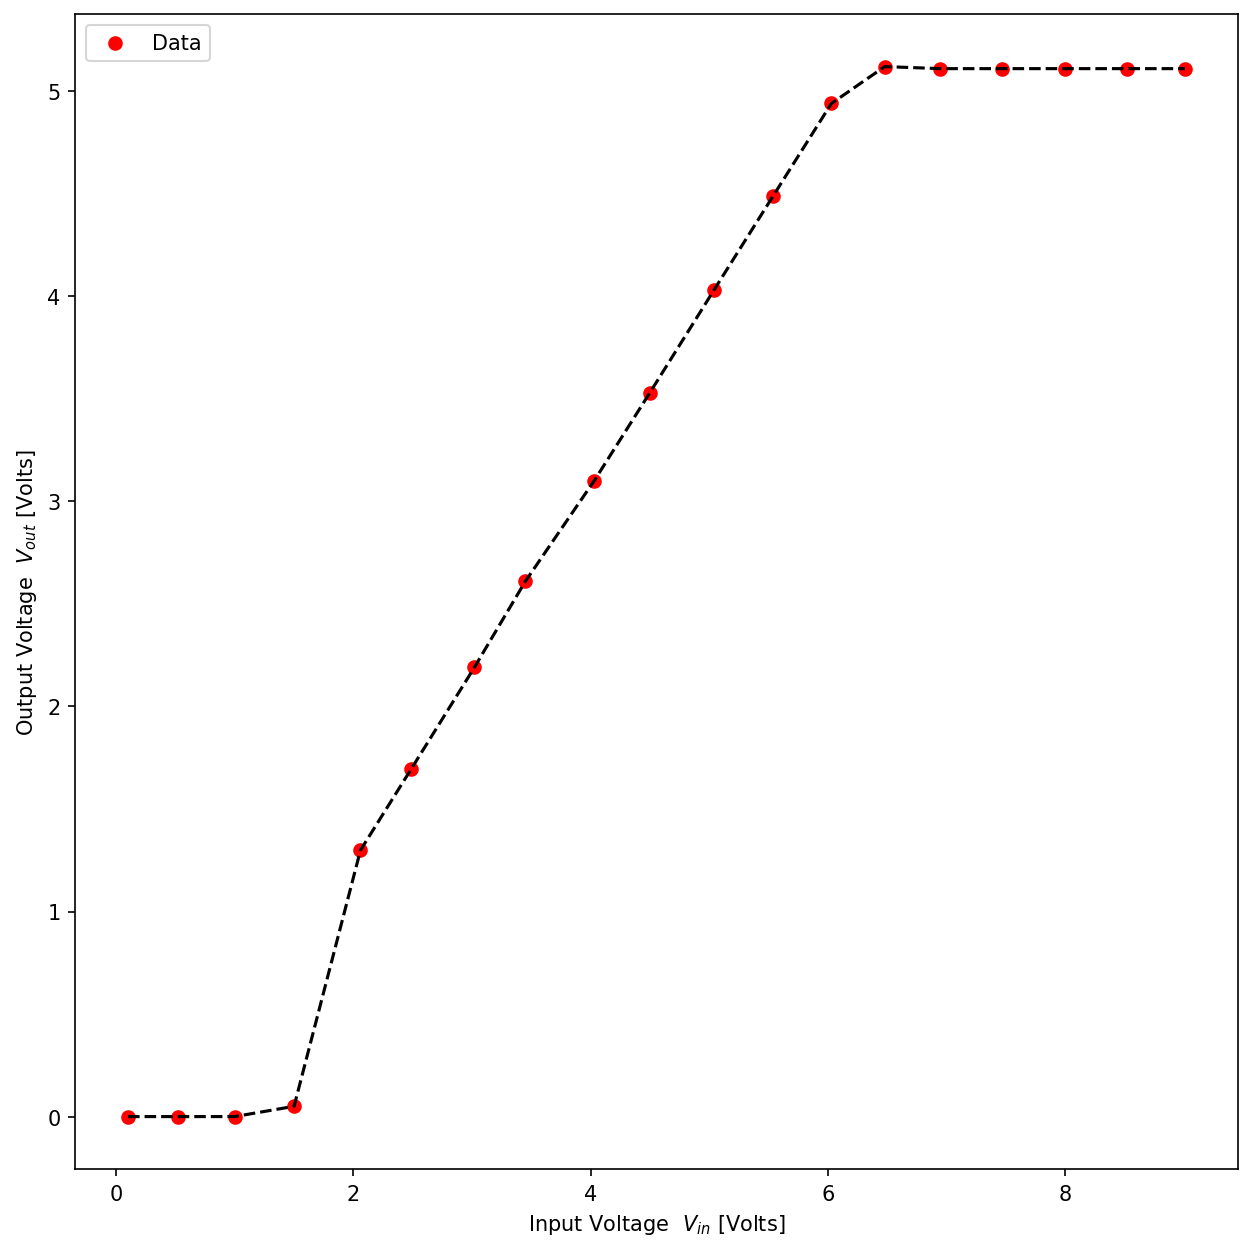

In [10]:
fig, ax = plt.subplots(1,1,dpi=150, figsize=(10, 10))
ax.scatter(V_i_IC, V_o_IC, color="red" ,label="Data")
ax.plot(V_i_IC, V_o_IC, "k--")
ax.legend(loc="upper left")
ax.set_xlabel("Input Voltage$~~V_{in}$ [Volts]")
ax.set_ylabel("Output Voltage$~~V_{out}$ [Volts]")
fig.savefig("linereg-ic.png")

## Load Regulation

In [11]:
fh = open('data5.txt', 'r')
data = [list(map(float, line.split())) for line in fh.readlines()[1:]]
fh.close()
data = np.array(data)

R_L_IC = data[:, 0] + 2.2
V_o_IC = data[:, 1]

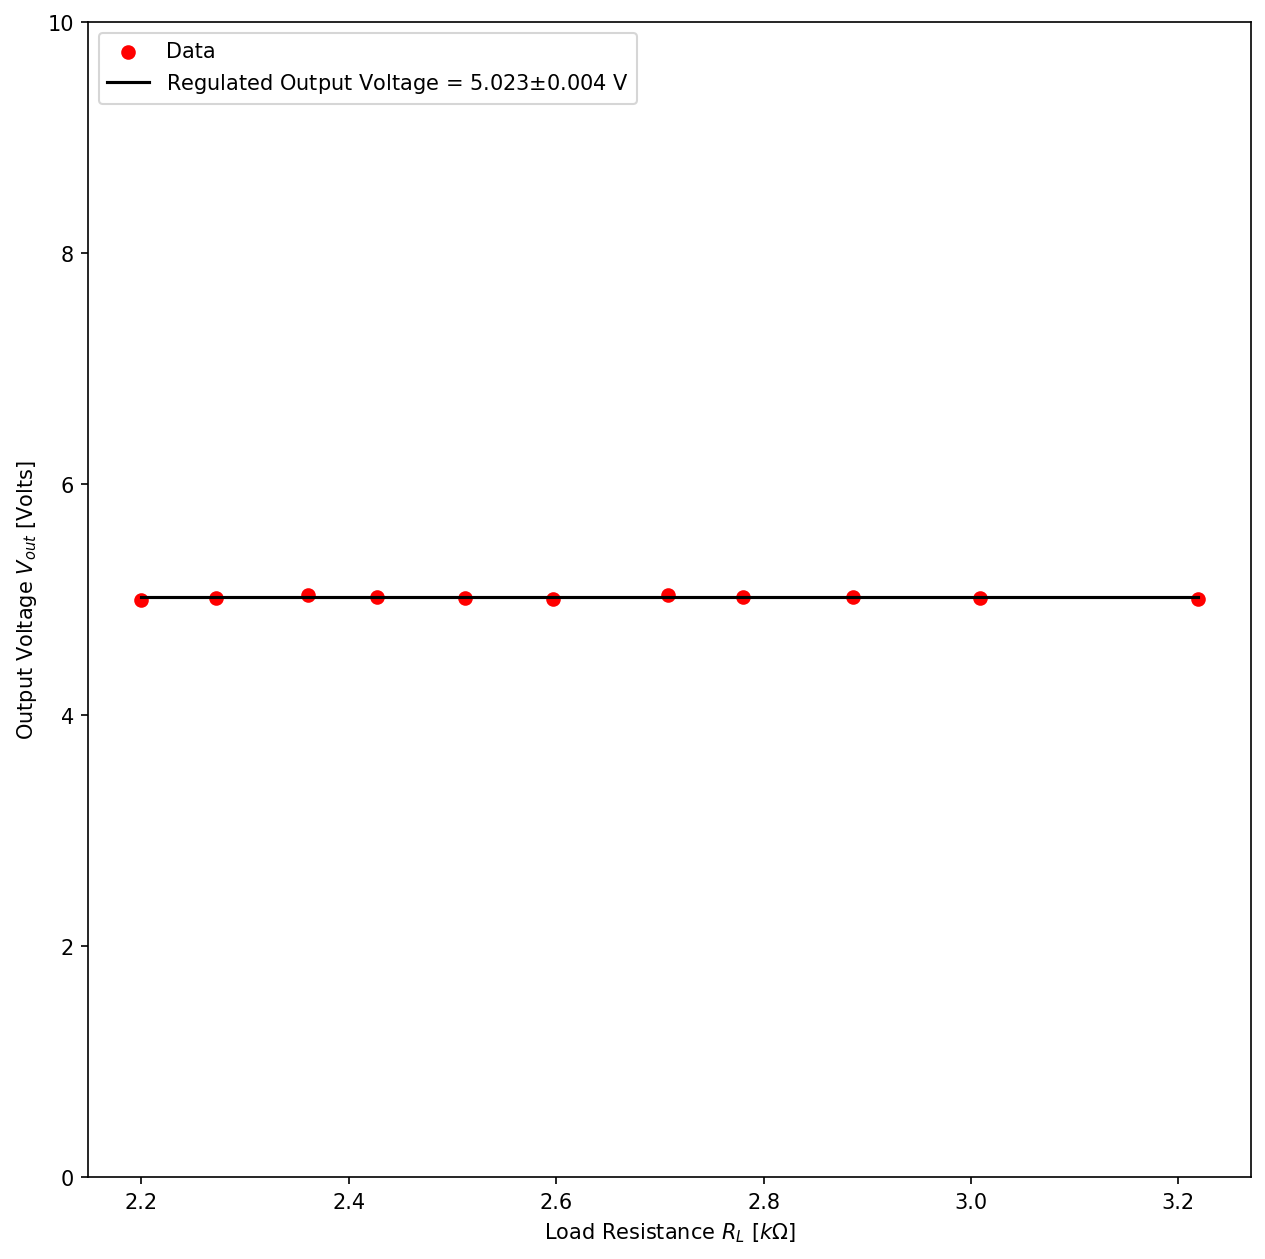

In [12]:
fig, ax = plt.subplots(1,1,dpi=150, figsize=(10, 10))
ax.scatter(R_L_IC, V_o_IC, color="red", label="Data")
# ax.plot(R_L_IC, V_o_IC, "k--")
# ax.plot(V_i, V_o, "k--")
popt3, pcov3 = curve_fit(const, R_L_IC, V_o_IC)
ax.plot(R_L_IC, const(R_L_IC, popt3[0]), "k-", label=f"Regulated Output Voltage = {popt3[0]:.3f}"+r"$\pm$" + f"{np.sqrt(pcov3[0]).item():.3f} V")
ax.set_xlabel(r"Load Resistance$~R_L$ [$k\Omega$]")
ax.set_ylabel("Output Voltage$~V_{out}$ [Volts]")
ax.legend(loc="upper left")
ax.set_ylim(0, 10)
fig.savefig("loadreg-ic.png")